In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Final_DF_Cars.csv")

In [3]:
df.head()

,Unnamed: 0,km_driven,seats,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_cat_2001 - 2005,year_cat_2006 - 2010,year_cat_2011 - 2015,year_cat_2016 - 2020
0,0,145500,5,5400.0,23.40,74.00,1248,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,120000,5,4440.0,21.14,103.52,1498,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,140000,5,1896.0,17.70,78.00,1497,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,3,127000,5,2700.0,23.00,90.00,1396,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,4,120000,5,1560.0,16.10,88.20,1298,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,km_driven,seats,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_cat_2001 - 2005,year_cat_2006 - 2010,year_cat_2011 - 2015,year_cat_2016 - 2020
0,145500,5,5400.0,23.40,74.00,1248,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,120000,5,4440.0,21.14,103.52,1498,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,140000,5,1896.0,17.70,78.00,1497,0,0,1,1,0,1,0,0,0,1,0,1,0,0
3,127000,5,2700.0,23.00,90.00,1396,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,120000,5,1560.0,16.10,88.20,1298,0,0,1,1,0,1,0,0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     7902 non-null   int64  
 1   seats                         7902 non-null   int64  
 2   selling_price_USD             7902 non-null   float64
 3   mileage_kmpl                  7902 non-null   float64
 4   max_power_bhp                 7902 non-null   float64
 5   engine_CC                     7902 non-null   int64  
 6   fuel_Diesel                   7902 non-null   int64  
 7   fuel_LPG                      7902 non-null   int64  
 8   fuel_Petrol                   7902 non-null   int64  
 9   seller_type_Individual        7902 non-null   int64  
 10  seller_type_Trustmark Dealer  7902 non-null   int64  
 11  transmission_Manual           7902 non-null   int64  
 12  owner_Fourth & Above Owner    7902 non-null   int64  
 13  own

In [6]:
df['selling_price_USD'].describe()

count     7902.000000
mean      7773.228970
std       9643.184353
min        359.988000
25%       3240.000000
50%       5400.000000
75%       8280.000000
max      78276.000000
Name: selling_price_USD, dtype: float64

### Train | Test | Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('selling_price_USD', axis=1)
y = df['selling_price_USD']

In [9]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_eval_sc = scaler.transform(X_eval)
X_test_sc = scaler.transform(X_test)

### **Model**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train_sc, y_train)
prediction_1 = model.predict(X_eval_sc)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [14]:
MAE = mean_absolute_error(y_eval,prediction_1)
MSE = mean_squared_error(y_eval,prediction_1)
RMSE = np.sqrt(MSE)
MAE

3246.945364540365

In [15]:
RMSE

5260.464057820475

In [16]:
df["selling_price_USD"].mean()

7773.228970387244

In [17]:
model.coef_

array([-6.49880039e+02, -2.60368277e+02,  7.87338099e+02,  5.43223347e+03,
        6.33525593e+02, -3.44072309e+02,  1.47738682e+02, -7.14009042e+02,
       -1.20310723e+03, -7.31455832e+02, -1.80233118e+03, -1.29054585e+02,
       -2.49786371e+02,  3.56263655e+02, -1.20199411e+02, -3.56790219e+02,
       -1.20932143e+03, -1.55190425e+03,  3.88842433e+00])

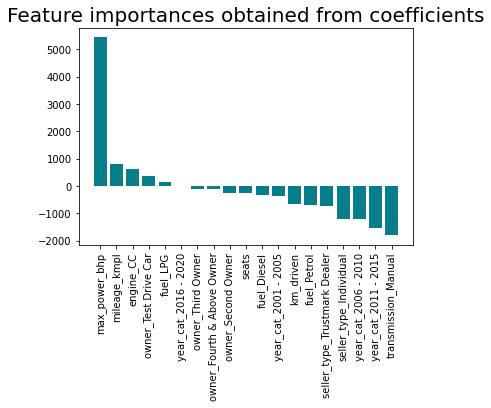

In [18]:
importances = pd.DataFrame(data={"Attribute": X_train.columns,
                                "Importance": model.coef_})

importances = importances.sort_values(by="Importance", ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='max_power_bhp', ylabel='selling_price_USD'>

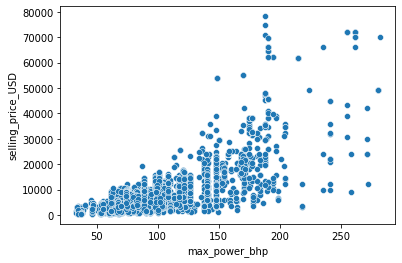

In [19]:
sns.scatterplot(data=df, x="max_power_bhp", y="selling_price_USD")

<AxesSubplot:xlabel='max_power_bhp', ylabel='selling_price_USD'>

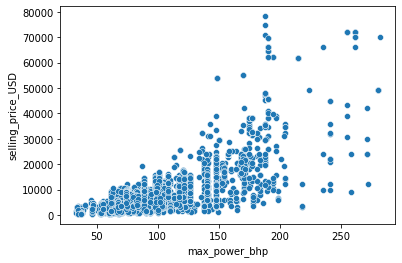

In [20]:
sns.scatterplot(data=df, x="max_power_bhp", y="selling_price_USD")

In [21]:
df = df.loc[df["max_power_bhp"] < 210]

In [22]:
df.head()

,km_driven,seats,selling_price_USD,mileage_kmpl,max_power_bhp,engine_CC,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,year_cat_2001 - 2005,year_cat_2006 - 2010,year_cat_2011 - 2015,year_cat_2016 - 2020
0,145500,5,5400.0,23.40,74.00,1248,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,120000,5,4440.0,21.14,103.52,1498,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,140000,5,1896.0,17.70,78.00,1497,0,0,1,1,0,1,0,0,0,1,0,1,0,0
3,127000,5,2700.0,23.00,90.00,1396,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,120000,5,1560.0,16.10,88.20,1298,0,0,1,1,0,1,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='max_power_bhp', ylabel='selling_price_USD'>

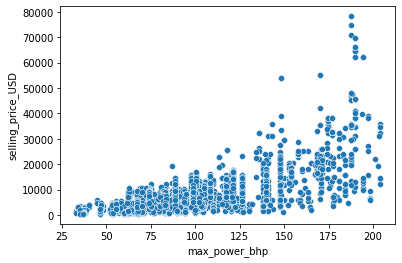

In [23]:
sns.scatterplot(data=df, x="max_power_bhp", y="selling_price_USD")

In [24]:
X = df.drop('selling_price_USD', axis=1)
y = df['selling_price_USD']

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.3, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_eval_sc = scaler.transform(X_eval)
X_test_sc = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_eval_sc)

In [27]:
MAE = mean_absolute_error(y_eval,y_pred)
MSE = mean_squared_error(y_eval,y_pred)
RMSE = np.sqrt(MSE)
print("MAE: ", MAE)
print("RMSE: ", RMSE)

MAE:  2959.9879882252662
RMSE:  4942.728945328433


In [28]:
residual_error = y_eval - y_pred

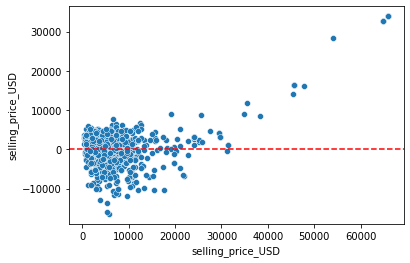

In [29]:
sns.scatterplot(x=y_eval, y=residual_error)
plt.axhline(y=0, color='r', linestyle='--')

**Model Adjustment - Polynomial Features**

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,5):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_OTHER, y_train, y_OTHER = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

    # SCALE DATA
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_eval_sc = scaler.transform(X_eval)
    X_eval_sc = scaler.transform(X_eval)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)

    model.fit(X_train_sc,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train_sc)
    eval_pred = model.predict(X_eval_sc)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    eval_RMSE = np.sqrt(mean_squared_error(y_eval,eval_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(eval_RMSE)
test_rmse_errors

[4942.728945328433, 2957.5593369864546, 22005130575171.168, 97135567472412.36]

In [32]:
test_rmse_errors

[4942.728945328433, 2957.5593369864546, 22005130575171.168, 97135567472412.36]

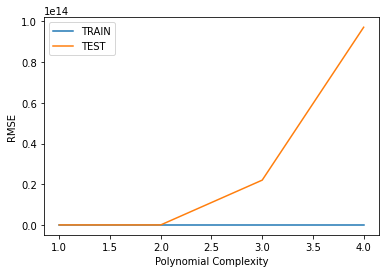

In [33]:
plt.plot(range(1,5),train_rmse_errors,label='TRAIN')
plt.plot(range(1,5),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [34]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_OTHER, y_train, y_OTHER = train_test_split(poly_features, y, test_size=0.3, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_eval_sc = scaler.transform(X_eval)
X_test_sc = scaler.transform(X_test)

# TRAIN ON THIS NEW POLY SET
model = LinearRegression(fit_intercept=True)

model.fit(X_train_sc,y_train)

# PREDICT ON BOTH TRAIN AND TEST
train_pred = model.predict(X_train_sc)
eval_pred = model.predict(X_eval_sc)

# Calculate Errors

# Errors on Train Set
train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

# Errors on Test Set
eval_RMSE = np.sqrt(mean_squared_error(y_eval,eval_pred))



In [35]:
print("train_RMSE", train_RMSE)
print("eval_RMSE", eval_RMSE)

train_RMSE 3155.3181723791563
eval_RMSE 2957.5593369864546


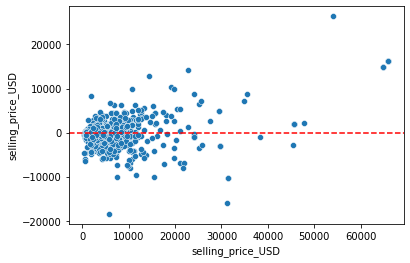

In [36]:
residual_error = y_eval - eval_pred

sns.scatterplot(x=y_eval, y=residual_error)
plt.axhline(y=0, color='r', linestyle='--')

<AxesSubplot:xlabel='selling_price_USD'>

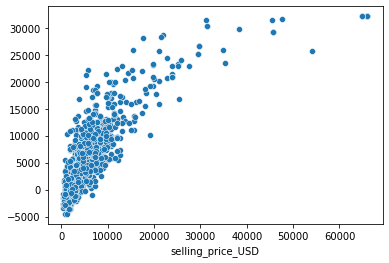

In [37]:
sns.scatterplot(x=y_eval, y=y_pred)

In [38]:
y_pred.min()

-4515.827332613176

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

# SPLIT THIS NEW POLY DATA SET
X_train, X_OTHER, y_train, y_OTHER = train_test_split(poly_features, y, test_size=0.3, random_state=101)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_eval_sc = scaler.transform(X_eval)
X_test_sc = scaler.transform(X_test)

# TRAIN ON THIS NEW POLY SET
lasso_model = Lasso(tol=1e-2)
lasso_alphas = np.linspace(5, 9, 20)
param_grid = {'alpha': lasso_alphas}
grid_model = GridSearchCV(estimator = lasso_model,
                            param_grid=param_grid,
                            scoring="neg_root_mean_squared_error",
                            cv=5,
                            verbose=3)

grid_model.fit(X_train_sc, y_train)

# PREDICT ON BOTH TRAIN AND TEST
train_pred = grid_model.predict(X_train_sc)
eval_pred = grid_model.predict(X_eval_sc)

# Calculate Errors

# Errors on Train Set
train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

# Errors on Test Set
eval_RMSE = np.sqrt(mean_squared_error(y_eval,eval_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....................alpha=5.0;, score=-3215.535 total time=   2.0s
[CV 2/5] END .....................alpha=5.0;, score=-3296.138 total time=   2.3s
[CV 3/5] END .....................alpha=5.0;, score=-3811.878 total time=   2.2s
[CV 4/5] END .....................alpha=5.0;, score=-3589.394 total time=   1.9s
[CV 5/5] END .....................alpha=5.0;, score=-3166.190 total time=   2.6s
[CV 1/5] END ......alpha=5.2105263157894735;, score=-3216.656 total time=   2.2s
[CV 2/5] END ......alpha=5.2105263157894735;, score=-3296.658 total time=   2.0s
[CV 3/5] END ......alpha=5.2105263157894735;, score=-3666.503 total time=   2.3s
[CV 4/5] END ......alpha=5.2105263157894735;, score=-3588.838 total time=   2.2s
[CV 5/5] END ......alpha=5.2105263157894735;, score=-3167.053 total time=   2.5s
[CV 1/5] END .......alpha=5.421052631578947;, score=-3217.713 total time=   1.8s
[CV 2/5] END .......alpha=5.421052631578947;, s

In [40]:
grid_model.best_estimator_

Lasso(alpha=7.526315789473684, tol=0.01)

In [41]:
print(np.sqrt(mean_squared_error(y_train,train_pred)))
print(np.sqrt(mean_squared_error(y_eval,eval_pred)))

3079.3584128704656
2897.6378426024726


In [42]:
from sklearn.metrics import r2_score
r2_score(y_eval, eval_pred)

0.8774831612834457

In [43]:
test_pred = grid_model.predict(X_test_sc)

In [44]:
print("RMSE", np.sqrt(mean_squared_error(y_test,test_pred)))
print("R^2", r2_score(y_test, test_pred))

RMSE 3125.595371612662
R^2 0.8265947166924326
